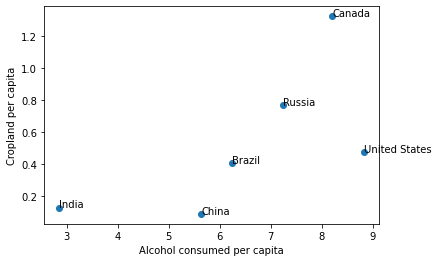

In [55]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

alcohol_path = "g:/My Drive/UMBC/Data Science/DATA 601/HW-1/SA_0000001400.csv"
    #I manually deteled the top row (in Excel), as I could not figure out how to do it in Python. 
    #I tried doing it from the pd.dataframe, but it kept column headings the same and removed a row of data
    #I saw the type was <class '_io.TextIOWrapper'>, and it didn't have a method that I thought would do the trick
cropland_path = "g:/My Drive/UMBC/Data Science/DATA 601/HW-1/cropland-per-person-over-the-long-term.csv"
# def slash_funct(string): a failed attempt to format input file paths to replace / with \
#     raw_string = r'{string}'
#     new_string = raw_string.replace("\\","/")
#     return new_string

alcohol_df = pd.read_csv(alcohol_path) 
# print(alcohol_df.head(5))
#bool_alc_alltypes = alcohol_df['Beverage Types'] == 'All types' #only going to analyze all types
# bool_alc_2017_df = bool_alc_alltypes_df['2017'] != alcohol_df.isna #going to analyze 2017 data

alcohol_alltypes_df = alcohol_df.iloc[::5] #I tried to filter by "All types", but was unable to. This way works as well
#alcohol_alltypes_df = alcohol_df[alcohol_df['Beverage Types'] == 'All types']
#alcohol_alltypes.tail(500)

cropland_df = pd.read_csv(cropland_path)
crop_mask = cropland_df[cropland_df['Year'] == 2016] # filtering based on value

country_list = ['Brazil','Canada','China','India','Russia','United States'] #these are the countries the data sets have in common

cropland_country_filter = crop_mask[crop_mask['Entity'].isin(country_list)] #filtering by countries
# print(alcohol_country_filter) # Greenland, Russia, United States not returned

alcohol_alltypes_df = alcohol_alltypes_df.replace("United States of America","United States") #syncing terminology
alcohol_alltypes_df = alcohol_alltypes_df.replace("Russian Federation","Russia") #syncing terminology

alcohol_country_filter = alcohol_alltypes_df[alcohol_alltypes_df["Country"].isin(country_list)]
#alcohol_country_filter.head(10)

#print(alcohol_country_filter['Country']) #confirm sets have same order
#print(cropland_country_filter['Entity']) #confirm sets have same order


x = alcohol_country_filter['2017']
y = cropland_country_filter['Cropland per capita (HYDE (2017))']
#alc_data_convert = alcohol_country_filter['Country'].astype('float').dtypes
#print(cropland_country_filter['Entity'])

plt.plot(x,y,'o')
plt.xlabel('Alcohol consumed per capita')
plt.ylabel('Cropland per capita')

for i in np.arange(0,6):
    plt.text(alcohol_country_filter['2017'].values[i],cropland_country_filter['Cropland per capita (HYDE (2017))'].values[i],country_list[i])


In [52]:
for i in np.arange(0,5):
    print(alcohol_country_filter['2017'].values[i])
    print(cropland_country_filter['Cropland per capita (HYDE (2017))'].values[i])
    print(country_list[i])

6.24
0.4025893
Brazil
8.2
1.321181925
Canada
5.64
0.087909725
China
2.86
0.127459352
India
7.24
0.76616562
Russia


In [200]:
alcohol_country_filter.head(5)

,Country,Data Source,Beverage Types,2018,2017,2016,2015,2014,2013,2012,2011,2010
115,Brazil,Data source,All types,6.19,6.24,6.33,6.59,6.88,6.82,7.08,7.11,7.12
155,Canada,Data source,All types,8.20,8.20,8.10,8.00,8.00,8.20,8.30,8.20,8.30
175,China,Data source,All types,5.62,5.64,5.63,5.66,5.76,5.76,5.69,5.57,5.75
385,India,Data source,All types,3.05,2.86,2.97,3.01,3.01,3.05,3.06,2.96,2.74
695,Russia,Data source,All types,7.69,7.24,8.20,8.36,9.25,10.17,10.86,10.92,10.95
